In [1]:
import torch
import matplotlib
import matplotlib.pyplot as plt

import utils.dataset as dataset
import utils.skel as skel

from utils.dataset import SIGNUMDataset
from IPython.display import clear_output
from torch.utils.data import Dataset, DataLoader

In [2]:
test_dataset = SIGNUMDataset('/scratch/datasets/SIGNUM', use_pose=True, subsample=10)
test_dataloader = DataLoader(test_dataset, batch_size=1, shuffle=False, num_workers=0, collate_fn=test_dataset.collate)

In [3]:
print(len(test_dataloader))

3


In [3]:
print(test_dataset.pose_folders)
print(test_dataset.sentence_folders)
# print(test_dataset.pose_paths[0])

['/scratch/datasets/SIGNUM/s01-p01/con0001_h5/', '/scratch/datasets/SIGNUM/s01-p01/con0002_h5/', '/scratch/datasets/SIGNUM/s01-p01/con0003_h5/']
['/scratch/datasets/SIGNUM/s01-p01/con0001/', '/scratch/datasets/SIGNUM/s01-p01/con0002/', '/scratch/datasets/SIGNUM/s01-p01/con0003/']


In [4]:
for i, data in enumerate(test_dataloader):
    img_seq = data['img_seq']
    pose_seq = data['pose_seq']
    transl_eng = data['transl_eng']
    transl_deu = data['transl_deu']
    print(img_seq.shape)
    print(pose_seq.shape)
    

torch.Size([1, 12, 3, 256, 256])
torch.Size([1, 11, 57, 2])
torch.Size([1, 15, 3, 256, 256])
torch.Size([1, 14, 57, 2])
torch.Size([1, 15, 3, 256, 256])
torch.Size([1, 14, 57, 2])


In [5]:
print(print(pose_seq.shape))
pose = pose_seq[0,8]
print(pose)
print(pose.shape)

torch.Size([1, 14, 57, 2])
None
tensor([[-1.4006,  0.6649],
        [ 0.0000,  0.0000],
        [ 0.6924, -0.1472],
        [-1.2093, -0.5147],
        [-0.1274, -0.7790],
        [-0.4930,  0.3409],
        [-0.1348,  0.4558],
        [ 1.6190, -0.6553],
        [-1.1873, -0.9275],
        [-1.4186, -0.5593],
        [-1.0718, -1.2015],
        [-1.6382,  0.4561],
        [-1.6333, -0.0113],
        [-1.6479,  0.0560],
        [-1.8627, -0.0903],
        [ 1.1615, -0.6435],
        [ 1.4066, -0.7001],
        [ 1.2257, -0.7768],
        [ 0.9453, -0.8320],
        [ 0.6231, -0.8756],
        [ 1.2325, -0.7894],
        [ 1.4165, -0.8839],
        [ 1.6399, -0.9399],
        [ 1.8339, -0.9697],
        [ 1.2154, -0.7703],
        [ 1.4729, -0.8651],
        [ 1.5718, -0.8898],
        [ 1.5615, -0.8903],
        [ 1.2522, -0.7284],
        [ 1.4470, -0.8062],
        [ 1.5504, -0.8346],
        [ 1.5164, -0.8291],
        [ 1.2208, -0.6681],
        [ 1.3959, -0.7291],
        [ 1.4928

torch.Size([57, 2])


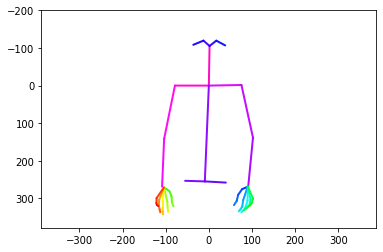

In [6]:
fig = plt.figure()

for i, pose in enumerate(pose_seq[0]):
    clear_output(wait=True)
    ax = plt.subplot(111)
    pose = skel.denormalize_pose(pose, test_dataset.mean, test_dataset.std)
    print(pose.shape)
    skel.plot_pose2D(ax, pose)
    plt.show()